In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


# New Section

In [ ]:
df = pd.read_csv("fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
df.shape

(17880, 18)

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

,0
job_id,int64
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
null_count=df.isnull().sum().sort_values(ascending=False)
null_count

,0
salary_range,15012
department,11547
required_education,8105
benefits,7212
required_experience,7050
function,6455
industry,4903
employment_type,3471
company_profile,3308
requirements,2696


In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
df['location'] =df['location'].fillna("Unknown")
df['location']

,location
0,"US, NY, New York"
1,"NZ, , Auckland"
2,"US, IA, Wever"
3,"US, DC, Washington"
4,"US, FL, Fort Worth"
...,...
17875,"CA, ON, Toronto"
17876,"US, PA, Philadelphia"
17877,"US, TX, Houston"
17878,"NG, LA, Lagos"


In [ ]:
df['department']=df['department'].fillna("Unknown")
df['employment_type']=df['employment_type'].fillna("Unknown")
df.isnull().sum()

,0
job_id,0
title,0
location,0
department,0
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [ ]:
df['function']=df['function'].fillna("Unknown")
df['industry']=df['industry'].fillna("Unknown")
df['required_education']=df['required_education'].fillna("Unknown")
df.isnull().sum()

,0
job_id,0
title,0
location,346
department,0
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [ ]:
df['salary_range'] = df['salary_range'].fillna(-1)
df['company_profile'] = df['company_profile'].fillna("None")
df['description'] = df['description'].fillna("None")
df['requirements'] = df['requirements'].fillna("None")
df['benefits'] = df['benefits'].fillna("None")
df.isnull().sum()

,0
job_id,0
title,0
location,346
department,0
salary_range,0
company_profile,0
description,0
requirements,0
benefits,0
telecommuting,0


In [ ]:
df['required_experience']=df['required_experience'].fillna("Unknown")
df.isnull().sum()

,0
job_id,0
title,0
location,346
department,0
salary_range,0
company_profile,0
description,0
requirements,0
benefits,0
telecommuting,0


In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,-1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,None,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,-1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,-1,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,None,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,-1,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,-1,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df = df.dropna(thresh=int(0.7*len(df.columns)))
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,-1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,None,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,-1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,-1,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,None,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,-1,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,-1,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df = df.drop_duplicates()
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,-1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,None,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,-1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,-1,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,None,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,-1,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,-1,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,-1,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Unknown,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,-1,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Unknown,-1,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,None,0,0,0,Full-time,Unknown,Unknown,Unknown,Unknown,0
17878,17879,Graphic Designer,"NG, LA, Lagos",Unknown,-1,None,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
txt_cols=['title', 'description', 'company_profile', 'requirements', 'benefits']
for col in txt_cols:
  df[col]=df[col].str.strip().str.lower()

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,marketing intern,"US, NY, New York",Marketing,-1,"we're food52, and we've created a groundbreaki...","food52, a fast-growing, james beard award-winn...",experience with content management systems a m...,none,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0
1,2,customer service - cloud video production,"NZ, , Auckland",Success,-1,"90 seconds, the worlds cloud video production ...",organised - focused - vibrant - awesome!do you...,what we expect from you:your key responsibilit...,what you will get from usthrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0
2,3,commissioning machinery assistant (cma),"US, IA, Wever",Unknown,-1,valor services provides workforce solutions th...,"our client, located in houston, is actively se...",implement pre-commissioning and commissioning ...,none,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,0
3,4,account executive - washington dc,"US, DC, Washington",Sales,-1,our passion for improving quality of life thro...,the company: esri – environmental systems rese...,"education: bachelor’s or master’s in gis, busi...",our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,bill review manager,"US, FL, Fort Worth",Unknown,-1,spotsource solutions llc is a global human cap...,job title: itemization review managerlocation:...,qualifications:rn license in the state of texa...,full benefits offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


/tmp/ipython-input-2479077028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="fraudulent" ,data=df, palette='Set2')


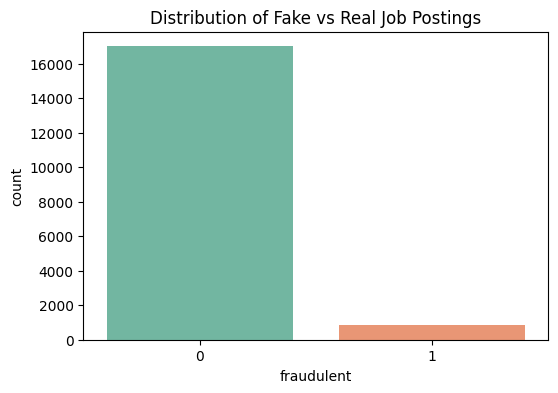

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="fraudulent" ,data=df, palette='Set2')
plt.title("Distribution of Fake vs Real Job Postings")
plt.show()

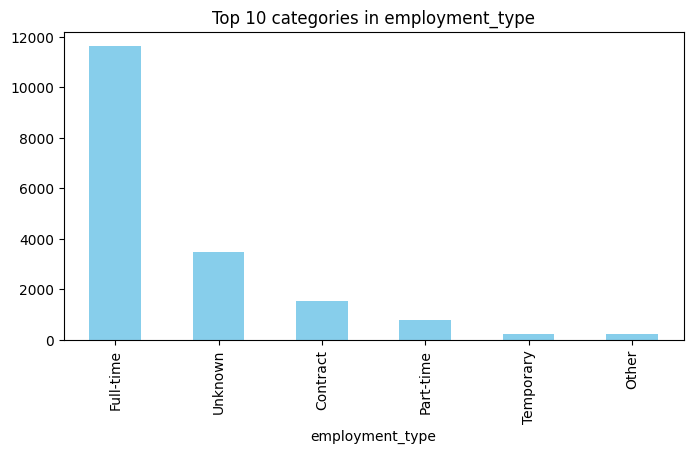

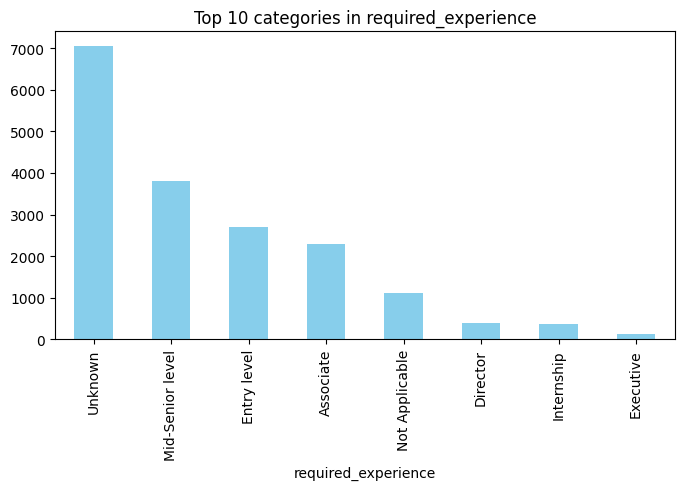

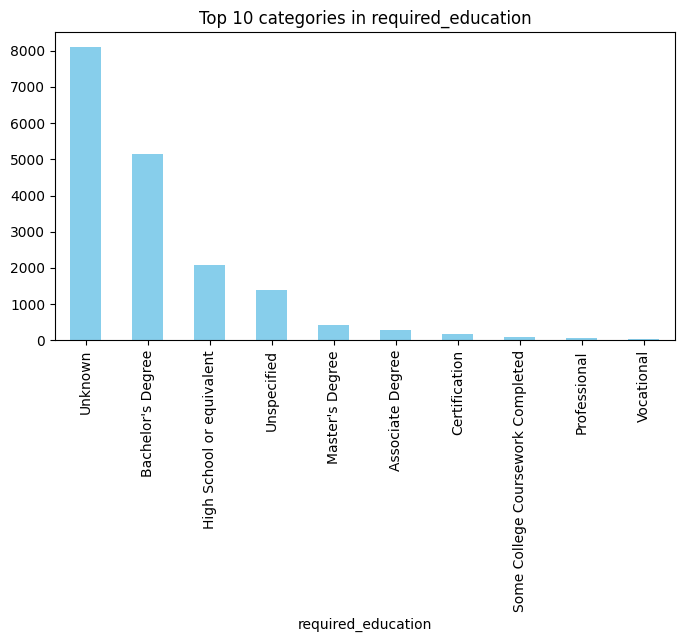

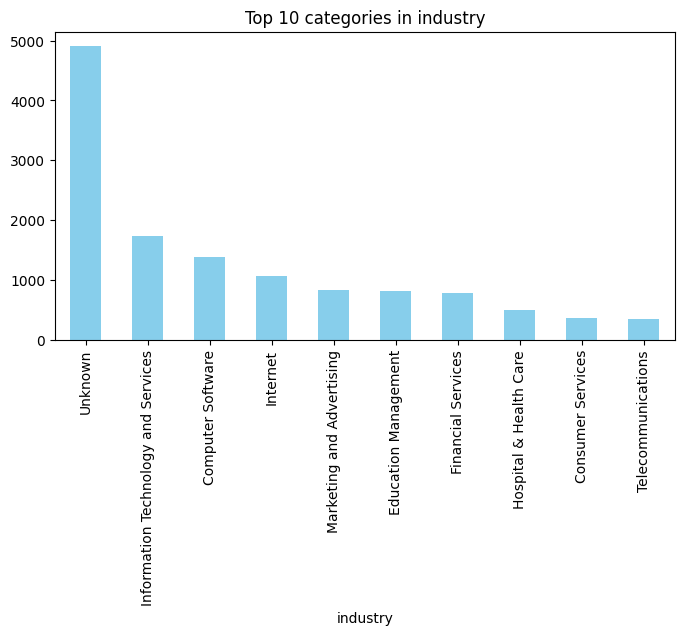

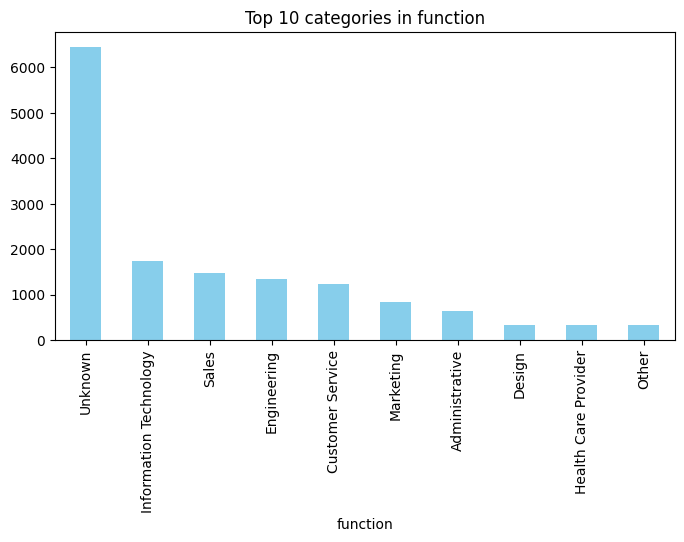

In [ ]:
categorical_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(f"Top 10 categories in {col}")
    plt.show()

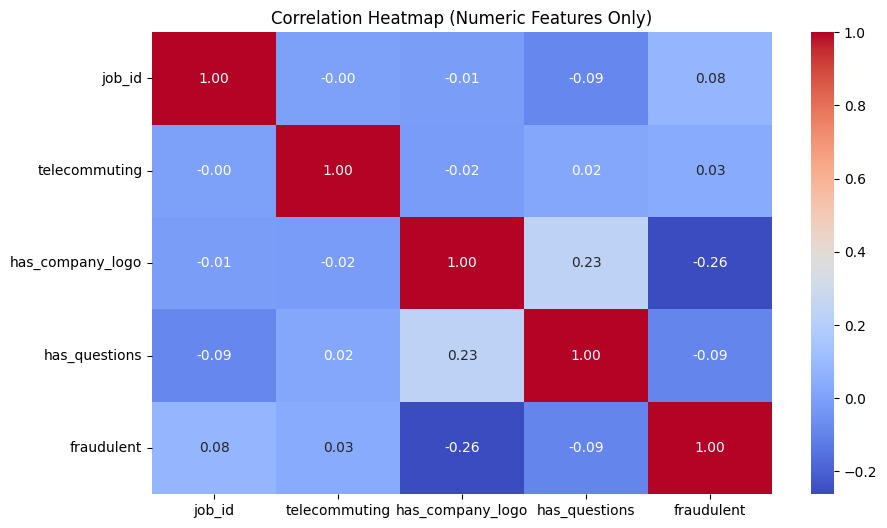

In [ ]:


numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))
df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))
df['requirements_length'] = df['requirements'].apply(lambda x: len(str(x).split()))


In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,title_length,description_length,requirements_length
0,1,marketing intern,"US, NY, New York",Marketing,-1,"we're food52, and we've created a groundbreaki...","food52, a fast-growing, james beard award-winn...",experience with content management systems a m...,none,0,...,0,Other,Internship,Unknown,Unknown,Marketing,0,2,124,115
1,2,customer service - cloud video production,"NZ, , Auckland",Success,-1,"90 seconds, the worlds cloud video production ...",organised - focused - vibrant - awesome!do you...,what we expect from you:your key responsibilit...,what you will get from usthrough being part of...,0,...,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0,6,315,200
2,3,commissioning machinery assistant (cma),"US, IA, Wever",Unknown,-1,valor services provides workforce solutions th...,"our client, located in houston, is actively se...",implement pre-commissioning and commissioning ...,none,0,...,0,Unknown,Unknown,Unknown,Unknown,Unknown,0,4,50,164
3,4,account executive - washington dc,"US, DC, Washington",Sales,-1,our passion for improving quality of life thro...,the company: esri – environmental systems rese...,"education: bachelor’s or master’s in gis, busi...",our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,5,346,176
4,5,bill review manager,"US, FL, Fort Worth",Unknown,-1,spotsource solutions llc is a global human cap...,job title: itemization review managerlocation:...,qualifications:rn license in the state of texa...,full benefits offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,3,168,89


In [ ]:
df_encoded = pd.get_dummies(df, columns=['employment_type', 'required_experience', 'required_education'], drop_first=True)


In [ ]:
numeric_features = df_encoded[['title_length','description_length','requirements_length'] +
                              [col for col in df_encoded.columns if col.startswith('has_')]]


In [ ]:
y = df['fraudulent']
y

,fraudulent
0,0
1,0
2,0
3,0
4,0
...,...
17875,0
17876,0
17877,0
17878,0


In [ ]:
print(df['fraudulent'].value_counts())

fraudulent
0    17014
1      866
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


text_features = ['title', 'company_profile', 'description', 'requirements', 'benefits']
categorical_features = ['location', 'department', 'salary_range',
                        'employment_type', 'required_experience',
                        'required_education', 'industry', 'function']
numeric_features = ['telecommuting', 'has_company_logo', 'has_questions']

preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=5000, stop_words='english'), 'description'),

        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])


In [ ]:
print(df['fraudulent'].value_counts())

fraudulent
0    17014
1      866
Name: count, dtype: int64


In [ ]:

for col in ['title', 'company_profile', 'description', 'requirements', 'benefits']:
    df[col] = df[col].fillna("")


categorical_features = ['location', 'department', 'salary_range',
                        'employment_type', 'required_experience',
                        'required_education', 'industry', 'function']

for col in categorical_features:
    df[col] = df[col].fillna("Unknown")


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score
)
import joblib

In [ ]:
text_features = ['title', 'company_profile', 'description', 'requirements', 'benefits']
categorical_features = ['location', 'department', 'salary_range',
                        'employment_type', 'required_experience',
                        'required_education', 'industry', 'function']
numeric_features = ['telecommuting', 'has_company_logo', 'has_questions']

preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=5000, stop_words='english'), 'description'),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

In [ ]:
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=2000, solver='saga', penalty='l2',
        class_weight='balanced', random_state=42
    ))
])

In [ ]:
for col in categorical_features:
    df[col] = df[col].astype(str)

X = df.drop('fraudulent', axis=1)
y = df['fraudulent']


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Optional: reduce TF-IDF features for faster run
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=300, stop_words='english'), 'description'),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Re-define the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000, solver='liblinear',  C=0.3, random_state=42
    ))
])

# Sequential CV (n_jobs=1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(
    model, X, y,
    cv=cv,
    scoring=['roc_auc', 'average_precision', 'f1', 'recall', 'precision'],
    n_jobs=1,  # <- sequential
    return_train_score=False
)

# Print results
print("CV ROC-AUC:", scores['test_roc_auc'].mean())
print("CV PR-AUC:", scores['test_average_precision'].mean())
print("CV F1:", scores['test_f1'].mean())
print("CV Recall:", scores['test_recall'].mean())
print("CV Precision:", scores['test_precision'].mean())


CV ROC-AUC: 0.9578307793703742
CV PR-AUC: 0.7332883133546503
CV F1: 0.5821890360490146
CV Recall: 0.4318782805129227
CV Precision: 0.8994226206507381


In [ ]:
# Split into train/test before fitting final model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit the model on training set
model.fit(X_train, y_train)
print("Model trained on training data.")


Model trained on training data.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


ROC-AUC: 0.9669010172934795
PR-AUC: 0.7643486498259671

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3403
           1       0.97      0.36      0.52       173

    accuracy                           0.97      3576
   macro avg       0.97      0.68      0.75      3576
weighted avg       0.97      0.97      0.96      3576

Confusion Matrix:
 [[3401    2]
 [ 111   62]]


In [ ]:
import pandas as pd

new_job = pd.DataFrame([{
    'title': "Software Engineer",
    'location': "New York",
    'department': "IT",
    'salary_range': -1,  # use -1 if unknown
    'employment_type': "Full-time",
    'required_experience': "Mid-Senior level",
    'required_education': "Bachelors",
    'industry': "Information Technology",
    'function': "Engineering",
    'description': "Looking for an experienced software engineer to join our IT team.",
    'requirements': "Must know Python, Java, SQL.",
    'benefits': "Health insurance, flexible hours.",
    'telecommuting': 0,
    'has_company_logo': 1,
    'has_questions': 0,
    'company_profile': "Leading IT company providing software solutions."
}])


In [ ]:
categorical_features = ['location', 'department', 'salary_range',
                        'employment_type', 'required_experience',
                        'required_education', 'industry', 'function']

for col in categorical_features:
    new_job[col] = new_job[col].astype(str)


In [ ]:
numeric_features = ['telecommuting', 'has_company_logo', 'has_questions']

for col in numeric_features:
    new_job[col] = pd.to_numeric(new_job[col])


In [ ]:
prob_fake = model.predict_proba(new_job)[:, 1][0]
print(f"Probability this job is fake: {prob_fake:.2f}")

threshold = 0.5
prediction = "Fake" if prob_fake >= threshold else "Real"
print("This job posting is predicted as:", prediction)


Probability this job is fake: 0.01
This job posting is predicted as: Real


In [ ]:
fake_job = pd.DataFrame([{
    'title': "Work from home, earn $5000 weekly",
    'location': "Anywhere",
    'department': "Unknown",
    'salary_range': -1,
    'employment_type': "Full-time",
    'required_experience': "Not Applicable",
    'required_education': "None",
    'industry': "Internet",
    'function': "Sales",
    'description': "Earn money easily by working from home. No skills needed. Apply now!",
    'requirements': "Just a computer and internet connection.",
    'benefits': "Free gifts and high income",
    'telecommuting': 1,
    'has_company_logo': 0,
    'has_questions': 0,
    'company_profile': "We are a leading company making millions. Apply immediately."
}])

In [ ]:
categorical_features = ['location', 'department', 'salary_range',
                        'employment_type', 'required_experience',
                        'required_education', 'industry', 'function']

numeric_features = ['telecommuting', 'has_company_logo', 'has_questions']

for col in categorical_features:
    fake_job[col] = fake_job[col].astype(str)

for col in numeric_features:
    fake_job[col] = pd.to_numeric(fake_job[col])


In [ ]:
prob_fake = model.predict_proba(fake_job)[:, 1][0]
prediction = "Fake" if prob_fake >= 0.5 else "Real"

print(f"Probability this job is fake: {prob_fake:.2f}")
print("This job posting is predicted as:", prediction)


NameError: name 'fake_job' is not defined

In [ ]:

import pandas as pd
import numpy as np
from collections import Counter
from scipy.sparse import issparse

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    classification_report, confusion_matrix, roc_auc_score, average_precision_score
)
from imblearn.over_sampling import SMOTE, RandomOverSampler

# --- Prepare X and y (assumes `df` is already loaded) ---
X = df.drop('fraudulent', axis=1).copy()
y = df['fraudulent'].copy()

# Text columns we might have
text_cols = ['title', 'company_profile', 'description', 'requirements', 'benefits']
for c in text_cols:
    if c in X.columns:
        X[c] = X[c].fillna('').astype(str)

# --- Reduce categorical features to a compact, useful subset (helps memory) ---
requested_cat = [
    'employment_type', 'required_experience', 'industry'
]
categorical_features = [c for c in requested_cat if c in X.columns]
for c in categorical_features:
    X[c] = X[c].fillna('Unknown').astype(str)

# Numeric features: ensure numeric and fill missing with 0
numeric_features = [c for c in ['telecommuting', 'has_company_logo', 'has_questions'] if c in X.columns]
for c in numeric_features:
    X[c] = pd.to_numeric(X[c], errors='coerce').fillna(0)

# -------------------------
# Step 2: Train/test split (stratified)
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train label distribution:", Counter(y_train))
print("Test  label distribution:", Counter(y_test))

# -------------------------
# Step 3: Build OneHotEncoder robustly (handle sklearn API differences)
# -------------------------
try:
    # newer sklearn uses sparse_output
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
except TypeError:
    # older sklearn uses sparse
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=True)

# Build transformer list dynamically so we don't include empty groups
transformers = []
# Use 'description' for TF-IDF if available
text_feature = 'description' if 'description' in X.columns else next((c for c in text_cols if c in X.columns), None)
if text_feature:
    transformers.append(('text', TfidfVectorizer(max_features=500, stop_words='english'), text_feature))
if categorical_features:
    transformers.append(('cat', ohe, categorical_features))
if numeric_features:
    transformers.append(('num', 'passthrough', numeric_features))

preprocessor = ColumnTransformer(transformers=transformers, remainder='drop')

# Fit & transform
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

# Convert sparse -> dense for SMOTE (warn: may use lots of RAM)
if issparse(X_train_trans):
    X_train_dense = X_train_trans.toarray()
else:
    X_train_dense = X_train_trans

if issparse(X_test_trans):
    X_test_dense = X_test_trans.toarray()
else:
    X_test_dense = X_test_trans

print("Transformed shapes -> train:", X_train_dense.shape, " test:", X_test_dense.shape)

# -------------------------
# Step 4: Apply SMOTE (with Memory fallback)
# -------------------------
smote = SMOTE(random_state=42)
try:
    X_train_res, y_train_res = smote.fit_resample(X_train_dense, y_train)
    print("Used SMOTE")
except MemoryError:
    print("SMOTE caused MemoryError — falling back to RandomOverSampler (less memory-hungry).")
    ros = RandomOverSampler(random_state=42)
    X_train_res, y_train_res = ros.fit_resample(X_train_dense, y_train)

print("After resampling train label distribution:", Counter(y_train_res))

# -------------------------
# Step 5: Train classifier on resampled data
# -------------------------
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_res, y_train_res)

# -------------------------
# Step 6: Evaluate on original test set (do NOT resample test)
# -------------------------
y_proba = clf.predict_proba(X_test_dense)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC (Average Precision):", average_precision_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Train label distribution: Counter({0: 13611, 1: 693})
Test  label distribution: Counter({0: 3403, 1: 173})
Transformed shapes -> train: (14304, 647)  test: (3576, 647)
Used SMOTE
After resampling train label distribution: Counter({0: 13611, 1: 13611})

Accuracy: 0.9258948545861297
Balanced Accuracy: 0.8760231961258258
ROC-AUC: 0.9454697402326068
PR-AUC (Average Precision): 0.6080465450051603

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      3403
           1       0.38      0.82      0.52       173

    accuracy                           0.93      3576
   macro avg       0.68      0.88      0.74      3576
weighted avg       0.96      0.93      0.94      3576

Confusion Matrix:
 [[3169  234]
 [  31  142]]


In [ ]:

y_train_proba = clf.predict_proba(X_train_dense)[:, 1]
y_train_pred = (y_train_proba >= 0.5).astype(int)

print("\n--- TRAIN SET EVALUATION ---")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_train, y_train_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_proba))
print("PR-AUC (Average Precision):", average_precision_score(y_train, y_train_proba))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))


y_test_proba = clf.predict_proba(X_test_dense)[:, 1]
y_test_pred = (y_test_proba >= 0.5).astype(int)

print("\n--- TEST SET EVALUATION ---")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_proba))
print("PR-AUC (Average Precision):", average_precision_score(y_test, y_test_proba))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))



--- TRAIN SET EVALUATION ---
Accuracy: 0.9237975391498882
Balanced Accuracy: 0.9229815075087282
ROC-AUC: 0.977194300976536
PR-AUC (Average Precision): 0.7271601835195629

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     13611
           1       0.38      0.92      0.54       693

    accuracy                           0.92     14304
   macro avg       0.69      0.92      0.75     14304
weighted avg       0.97      0.92      0.94     14304

Confusion Matrix:
 [[12575  1036]
 [   54   639]]

--- TEST SET EVALUATION ---
Accuracy: 0.9258948545861297
Balanced Accuracy: 0.8760231961258258
ROC-AUC: 0.9454697402326068
PR-AUC (Average Precision): 0.6080465450051603

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      3403
           1       0.38      0.82      0.52       173

    accuracy                           0.93      3576
   macro avg 

In [ ]:
import pickle

# Save model
with open("job_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)

# Download model to your PC
from google.colab import files
files.download("job_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-1073856322.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="fraudulent", data=df, palette='Set2')


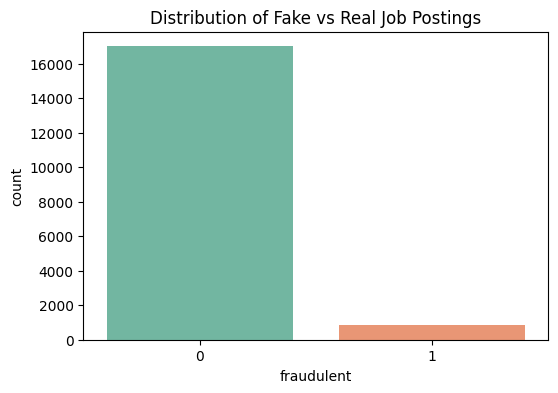

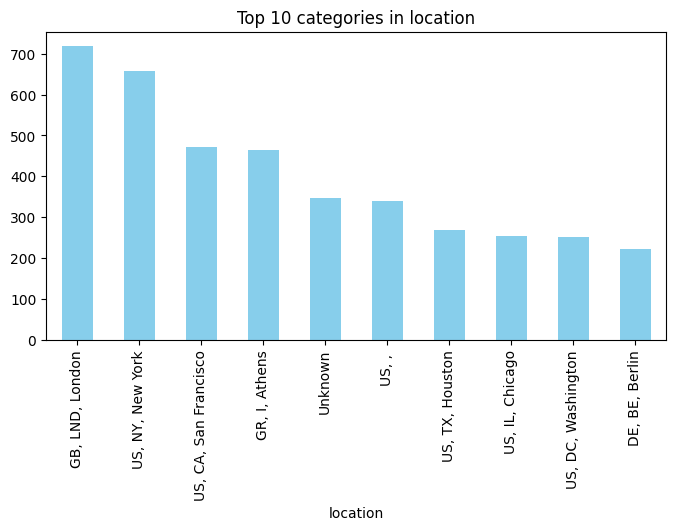

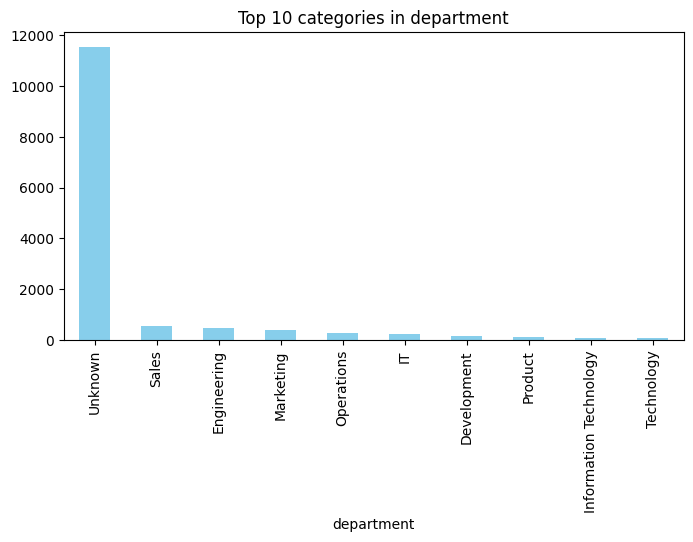

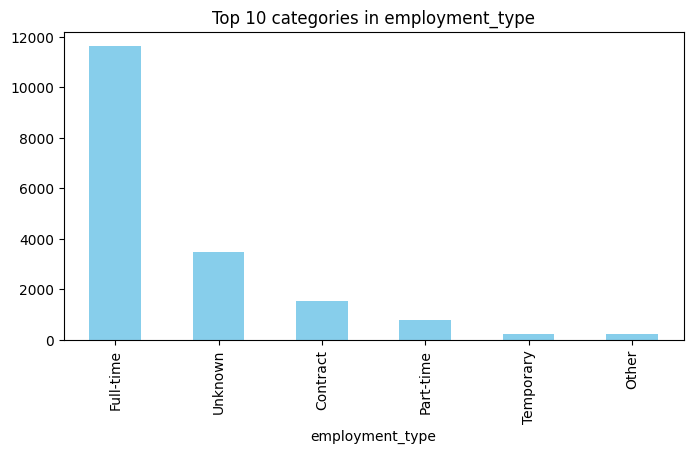

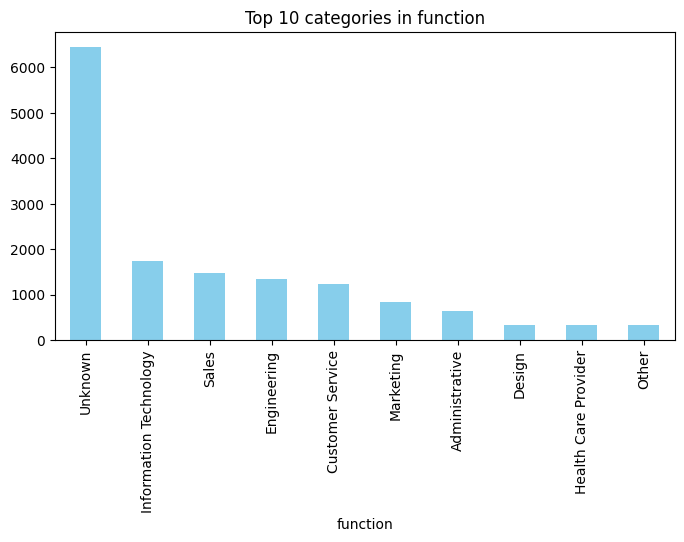

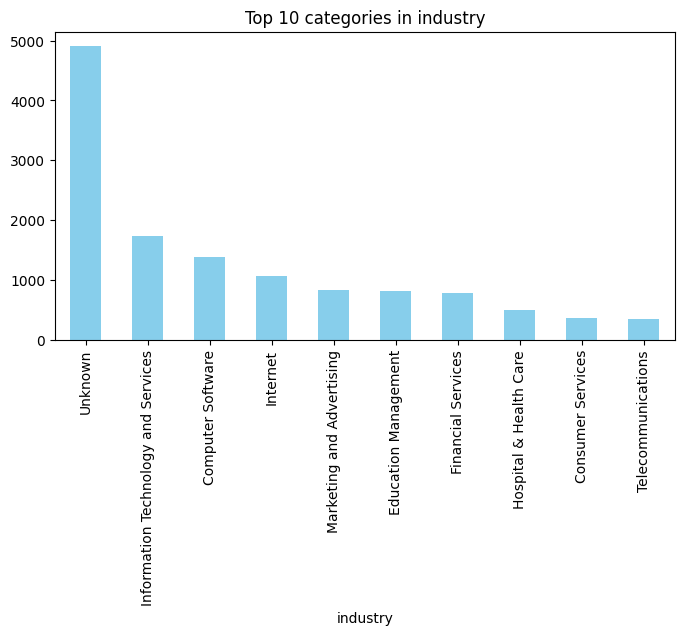

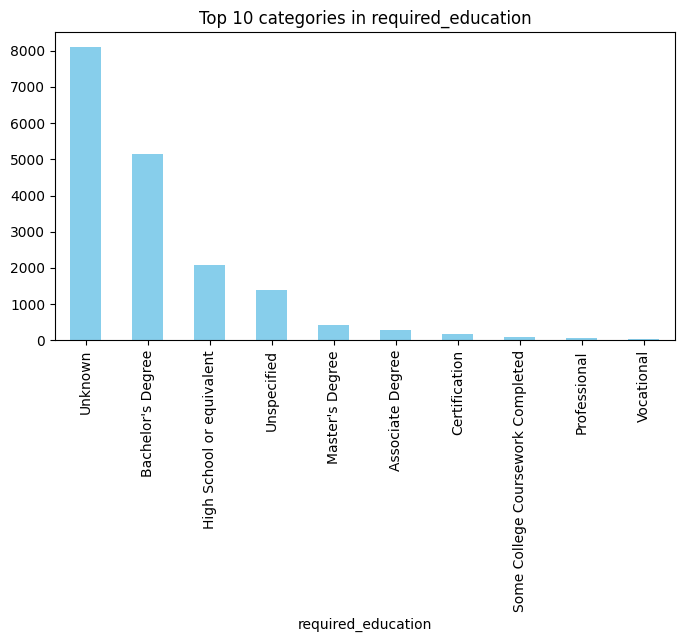

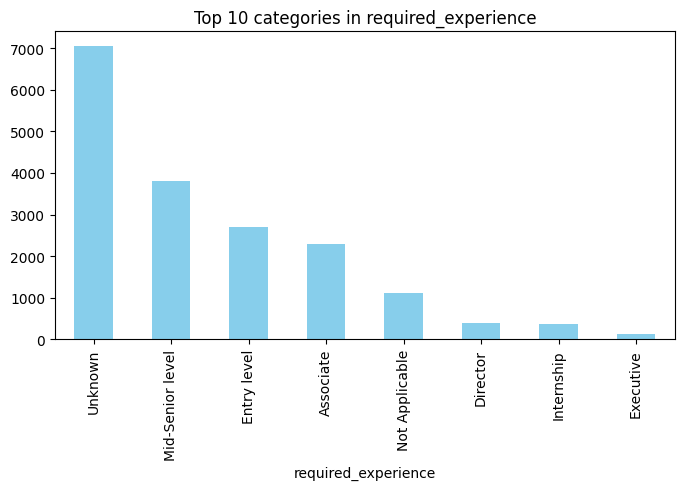

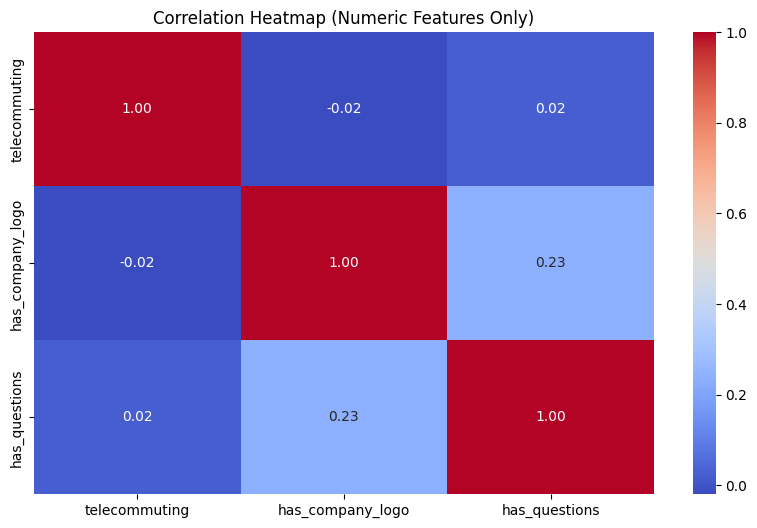

Train label distribution: Counter({0: 13611, 1: 693})
Test label distribution: Counter({0: 3403, 1: 173})
Used SMOTE
After resampling train label distribution: Counter({0: 13611, 1: 13611})
Model trained on training data.

--- TRAIN SET EVALUATION ---
Accuracy: 0.9769295302013423
Balanced Accuracy: 0.9810297947833764
ROC-AUC: 0.997247154840278
PR-AUC (Average Precision): 0.9427659702575565

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     13611
           1       0.68      0.99      0.81       693

    accuracy                           0.98     14304
   macro avg       0.84      0.98      0.90     14304
weighted avg       0.98      0.98      0.98     14304

Confusion Matrix:
 [[13291   320]
 [   10   683]]

--- TEST SET EVALUATION ---
Accuracy: 0.9675615212527964
Balanced Accuracy: 0.9143751093475835
ROC-AUC: 0.9745753067252798
PR-AUC (Average Precision): 0.850026220929892

Classification Report:
           

(np.float64(0.0002099882786299799), 'Real')

In [ ]:
# -------------------------------
# Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.sparse import issparse

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    classification_report, confusion_matrix, roc_auc_score, average_precision_score
)
from imblearn.over_sampling import SMOTE, RandomOverSampler

# -------------------------------
# Load Dataset
# -------------------------------


df = pd.read_csv("fake_job_postings.csv")

# -------------------------------
# Data Cleaning
# -------------------------------
# Fill missing categorical columns
categorical_cols = ['location', 'department', 'employment_type', 'function',
                    'industry', 'required_education', 'required_experience']
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown").astype(str)

# Fill missing text columns
text_cols = ['title', 'description', 'company_profile', 'requirements', 'benefits']
for col in text_cols:
    df[col] = df[col].fillna("").str.strip().str.lower()

# Fill missing numeric features
numeric_features = ['telecommuting', 'has_company_logo', 'has_questions']
for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Drop columns with too many NaNs or duplicates
df = df.dropna(thresh=int(0.7*len(df.columns)))
df = df.drop_duplicates()

# -------------------------------
# Exploratory Visualization
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="fraudulent", data=df, palette='Set2')
plt.title("Distribution of Fake vs Real Job Postings")
plt.show()

# Categorical distribution plots
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(f"Top 10 categories in {col}")
    plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# Text feature lengths
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))
df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))
df['requirements_length'] = df['requirements'].apply(lambda x: len(str(x).split()))

# -------------------------------
# Prepare Features & Labels
# -------------------------------
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

# -------------------------------
# Preprocessing Pipeline
# -------------------------------
# Categorical features to one-hot encode
cat_features = ['location', 'department', 'employment_type',
                'required_experience', 'required_education', 'industry', 'function']

# Numeric features
num_features = ['telecommuting', 'has_company_logo', 'has_questions']

# Text feature for TF-IDF
text_feature = 'description'

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=500, stop_words='english'), text_feature),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', 'passthrough', num_features)
    ]
)

# -------------------------------
# Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train label distribution:", Counter(y_train))
print("Test label distribution:", Counter(y_test))

# -------------------------------
# Transform Features
# -------------------------------
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

# Convert to dense for SMOTE
X_train_dense = X_train_trans.toarray() if issparse(X_train_trans) else X_train_trans
X_test_dense = X_test_trans.toarray() if issparse(X_test_trans) else X_test_trans

# -------------------------------
# Handle Class Imbalance with SMOTE
# -------------------------------
smote = SMOTE(random_state=42)
try:
    X_train_res, y_train_res = smote.fit_resample(X_train_dense, y_train)
    print("Used SMOTE")
except MemoryError:
    print("SMOTE caused MemoryError — using RandomOverSampler")
    ros = RandomOverSampler(random_state=42)
    X_train_res, y_train_res = ros.fit_resample(X_train_dense, y_train)

print("After resampling train label distribution:", Counter(y_train_res))

# -------------------------------
# Train Classifier
# -------------------------------
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_res, y_train_res)
print("Model trained on training data.")

# -------------------------------
# Evaluate Model
# -------------------------------
def evaluate_model(clf, X, y, dataset_name=""):
    y_proba = clf.predict_proba(X)[:, 1]
    y_pred = (y_proba >= 0.5).astype(int)

    print(f"\n--- {dataset_name} EVALUATION ---")
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Balanced Accuracy:", balanced_accuracy_score(y, y_pred))
    print("ROC-AUC:", roc_auc_score(y, y_proba))
    print("PR-AUC (Average Precision):", average_precision_score(y, y_proba))
    print("\nClassification Report:\n", classification_report(y, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# Train set evaluation
evaluate_model(clf, X_train_dense, y_train, "TRAIN SET")

# Test set evaluation
evaluate_model(clf, X_test_dense, y_test, "TEST SET")

# -------------------------------
# Predict on New Job Postings
# -------------------------------
def predict_new_job(model, preprocessor, job_df):
    for col in cat_features:
        job_df[col] = job_df[col].astype(str)
    for col in num_features:
        job_df[col] = pd.to_numeric(job_df[col])
    job_trans = preprocessor.transform(job_df)
    job_trans = job_trans.toarray() if issparse(job_trans) else job_trans
    prob_fake = model.predict_proba(job_trans)[:, 1][0]
    prediction = "Fake" if prob_fake >= 0.5 else "Real"
    print(f"Probability this job is fake: {prob_fake:.2f}")
    print("Predicted as:", prediction)
    return prob_fake, prediction

# Example prediction
new_job = pd.DataFrame([{
    'title': "Software Engineer",
    'location': "New York",
    'department': "IT",
    'salary_range': -1,
    'employment_type': "Full-time",
    'required_experience': "Mid-Senior level",
    'required_education': "Bachelors",
    'industry': "Information Technology",
    'function': "Engineering",
    'description': "Looking for an experienced software engineer to join our IT team.",
    'requirements': "Must know Python, Java, SQL.",
    'benefits': "Health insurance, flexible hours.",
    'telecommuting': 0,
    'has_company_logo': 1,
    'has_questions': 0,
    'company_profile': "Leading IT company providing software solutions."
}])

predict_new_job(clf, preprocessor, new_job)


In [ ]:
import joblib

# Save the trained pipeline
joblib.dump(clf, 'fraud_job_model.pkl')

# Save the preprocessor if needed separately
joblib.dump(preprocessor, 'fraud_job_preprocessor.pkl')


['fraud_job_preprocessor.pkl']

In [ ]:
from google.colab import files


In [ ]:
# Download model
files.download('fraud_job_model.pkl')

# Download preprocessor (if needed)
files.download('fraud_job_preprocessor.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# -------------------------------
# Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.sparse import issparse

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    classification_report, confusion_matrix, roc_auc_score, average_precision_score
)
from imblearn.over_sampling import SMOTE, RandomOverSampler

import joblib

# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_csv("fake_job_postings.csv")

# -------------------------------
# Data Cleaning
# -------------------------------
categorical_cols = ['location', 'department', 'employment_type', 'function',
                    'industry', 'required_education', 'required_experience']
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown").astype(str)

text_cols = ['title', 'description', 'company_profile', 'requirements', 'benefits']
for col in text_cols:
    df[col] = df[col].fillna("").str.strip().str.lower()

numeric_features = ['telecommuting', 'has_company_logo', 'has_questions']
for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# -------------------------------
# Feature Engineering
# -------------------------------
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))
df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))
df['requirements_length'] = df['requirements'].apply(lambda x: len(str(x).split()))

engineered_features = ['title_length', 'description_length', 'requirements_length']

# -------------------------------
# Prepare Features & Labels
# -------------------------------
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

# -------------------------------
# Preprocessing Pipeline
# -------------------------------
text_features = ['title', 'description', 'requirements', 'company_profile']

# Build ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('title_tfidf', TfidfVectorizer(max_features=2000, stop_words='english'), 'title'),
        ('desc_tfidf', TfidfVectorizer(max_features=5000, stop_words='english'), 'description'),
        ('req_tfidf', TfidfVectorizer(max_features=2000, stop_words='english'), 'requirements'),
        ('profile_tfidf', TfidfVectorizer(max_features=1000, stop_words='english'), 'company_profile'),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_features),
        ('eng', StandardScaler(), engineered_features)
    ],
    remainder='drop'
)

# -------------------------------
# Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train label distribution:", Counter(y_train))
print("Test label distribution:", Counter(y_test))

# -------------------------------
# Define Model Pipeline
# -------------------------------
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=25,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", clf)
])

# -------------------------------
# Handle Class Imbalance with SMOTE
# -------------------------------
smote = SMOTE(random_state=42)
X_train_trans = preprocessor.fit_transform(X_train)
X_train_dense = X_train_trans.toarray() if issparse(X_train_trans) else X_train_trans
X_train_res, y_train_res = smote.fit_resample(X_train_dense, y_train)

print("After resampling:", Counter(y_train_res))

# -------------------------------
# Train Classifier
# -------------------------------
clf.fit(X_train_res, y_train_res)
print("RandomForest trained on resampled data.")

# -------------------------------
# Cross-Validation
# -------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_pipeline, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1)
print("Cross-Validation ROC-AUC:", scores.mean())

# -------------------------------
# Evaluation Function
# -------------------------------
def evaluate_model(clf, X, y, dataset_name=""):
    y_proba = clf.predict_proba(X)[:, 1]
    y_pred = (y_proba >= 0.5).astype(int)

    print(f"\n--- {dataset_name} EVALUATION ---")
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Balanced Accuracy:", balanced_accuracy_score(y, y_pred))
    print("ROC-AUC:", roc_auc_score(y, y_proba))
    print("PR-AUC:", average_precision_score(y, y_proba))
    print("\nClassification Report:\n", classification_report(y, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# Train set evaluation
evaluate_model(clf, X_train_dense, y_train, "TRAIN SET")

# Test set evaluation
X_test_trans = preprocessor.transform(X_test)
X_test_dense = X_test_trans.toarray() if issparse(X_test_trans) else X_test_trans
evaluate_model(clf, X_test_dense, y_test, "TEST SET")

# -------------------------------
# Save Full Pipeline
# -------------------------------
joblib.dump(model_pipeline, "fraud_job_pipeline.pkl")
print("✅ Full pipeline saved as fraud_job_pipeline.pkl")

# -------------------------------
# Predict on New Job Postings
# -------------------------------
def predict_new_job(pipeline, job_df):
    prob_fake = pipeline.predict_proba(job_df)[:, 1][0]
    prediction = "Fake" if prob_fake >= 0.5 else "Real"
    print(f"Probability this job is fake: {prob_fake:.2f}")
    print("Predicted as:", prediction)
    return prob_fake, prediction

# Example
new_job = pd.DataFrame([{
    'title': "Software Engineer",
    'location': "New York",
    'department': "IT",
    'salary_range': -1,
    'employment_type': "Full-time",
    'required_experience': "Mid-Senior level",
    'required_education': "Bachelors",
    'industry': "Information Technology",
    'function': "Engineering",
    'description': "Looking for an experienced software engineer to join our IT team.",
    'requirements': "Must know Python, Java, SQL.",
    'benefits': "Health insurance, flexible hours.",
    'telecommuting': 0,
    'has_company_logo': 1,
    'has_questions': 0,
    'company_profile': "Leading IT company providing software solutions.",
    'title_length': 2,
    'description_length': 12,
    'requirements_length': 6
}])

predict_new_job(model_pipeline, new_job)


Train label distribution: Counter({0: 13611, 1: 693})
Test label distribution: Counter({0: 3403, 1: 173})
After resampling: Counter({0: 13611, 1: 13611})
RandomForest trained on resampled data.
Cross-Validation ROC-AUC: 0.9798185819648543

--- TRAIN SET EVALUATION ---
Accuracy: 0.9924496644295302
Balanced Accuracy: 0.988500197669252
ROC-AUC: 0.9996961544239481
PR-AUC: 0.9951902725196121

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     13611
           1       0.88      0.98      0.93       693

    accuracy                           0.99     14304
   macro avg       0.94      0.99      0.96     14304
weighted avg       0.99      0.99      0.99     14304

Confusion Matrix:
 [[13514    97]
 [   11   682]]

--- TEST SET EVALUATION ---
Accuracy: 0.9804250559284117
Balanced Accuracy: 0.8937014093311071
ROC-AUC: 0.9898440512366682
PR-AUC: 0.898645975012258

Classification Report:
               precision    recall

(np.float64(0.15760328116936015), 'Real')